<h1><center> Projeto #1 - Análise Exploratória de Dados </center></h1>

In [ ]:
Arquivo retirado da base kaglle.com
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

contém taxas de suicídio no mundo. informações retiradas de diversos portais conforme link acima
Objetivo: Realizar análise de taxas de suicídios em cada país x idade x geração


In [1]:
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score

In [2]:
#leitura da base de dados
df = pd.read_csv("master.csv")


In [3]:
#verificando os 5 primeiros registros da base e cabeçalhos
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#REALIZANDO SANEAMENTO DOS CABEÇALHOS

df.drop(columns=['HDI for year'], inplace=True)
#SUICIDES_NO = NUMEROS DE SUICIDOS
#FALTA TROCAR NOMES DAS COLUNAS...

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [5]:
#QUAL O TAMANHO DA NOSSA BASE?
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (27820, 11)


In [6]:
#  VERIFICAR TIPOS DE DADOS DE CADA FEATURE
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

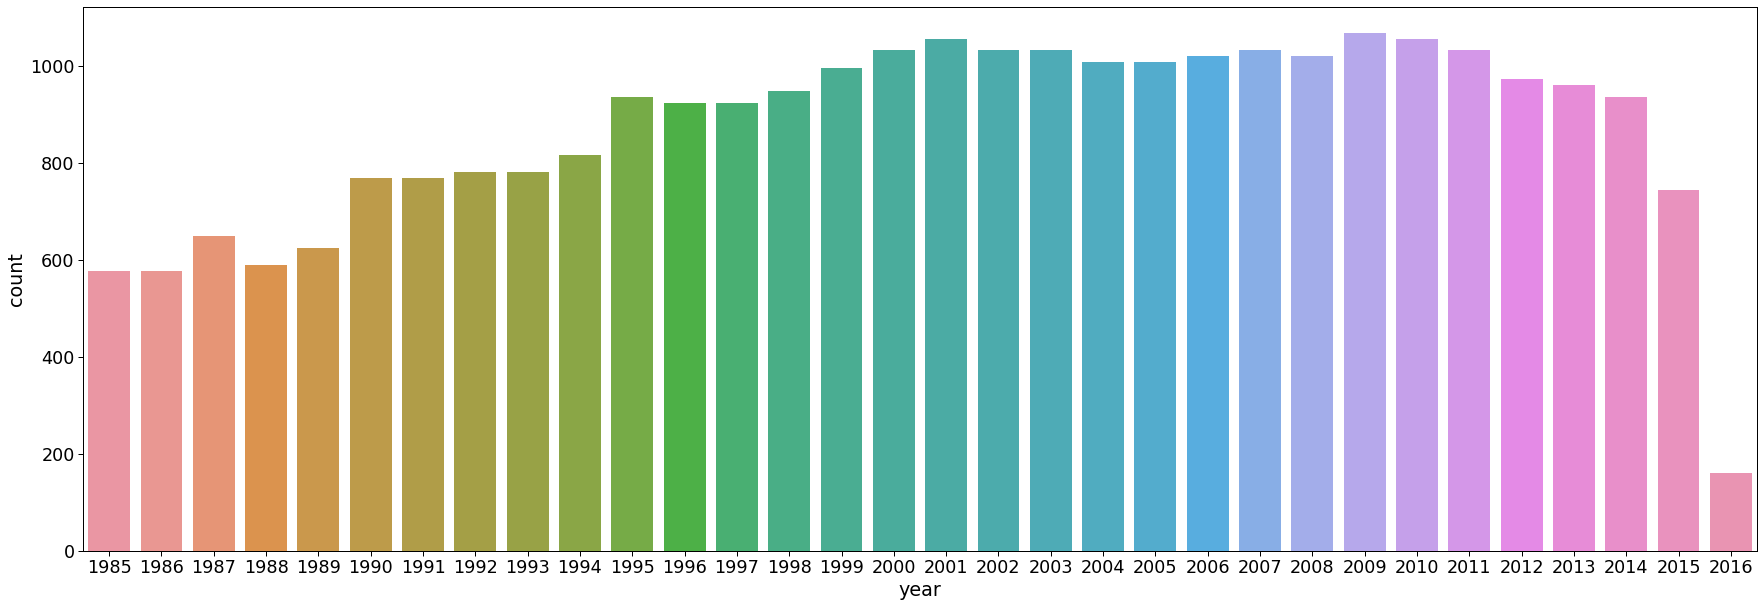

In [7]:
#quantidade de registros por ano
plt.figure(figsize=(30,10))
y = df['year']
sns.set_context("paper", 2.0, {"lines.linewidth": 4})
sns.countplot(y,label='count')

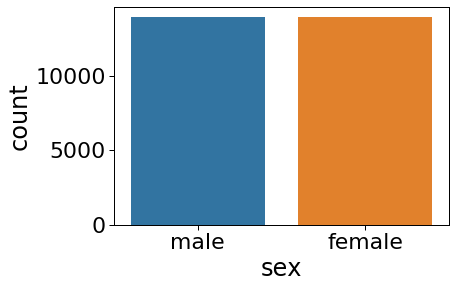

In [8]:
#REGISTROS POR SEXO
y = df['sex']

sns.set_context("paper", 2.5, {"lines.linewidth":4})
sns.countplot(y,label='count')

In [23]:
#SUICIDOS POR SEXO E FAIXA DE IDADE
suicides_sex_age = df[['sex', 'age', 'suicides_no']].groupby(['sex', 'age']).mean()
suicides_sex_age

suicides_no
sex    age                     
female 15-24 years    75.586816
       25-34 years    89.971133
       35-54 years   218.109866
       5-14 years      7.373970
       55-74 years   185.280483
       75+ years      95.641534
male   15-24 years   272.772512
       25-34 years   394.264972
       35-54 years   838.392072
       5-14 years     15.300217
       55-74 years   529.257648
       75+ years     185.753555

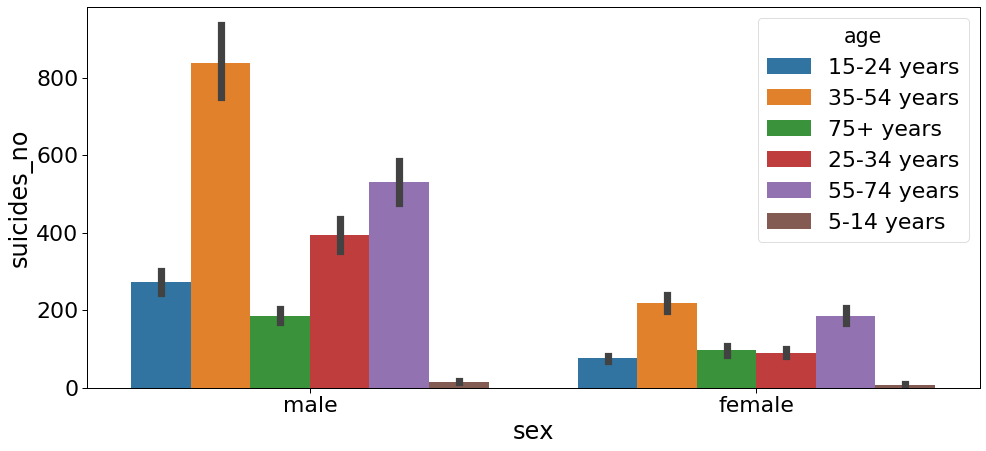

In [14]:
plt.figure(figsize=(16,7))
### Suicídos por sexo x idade
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

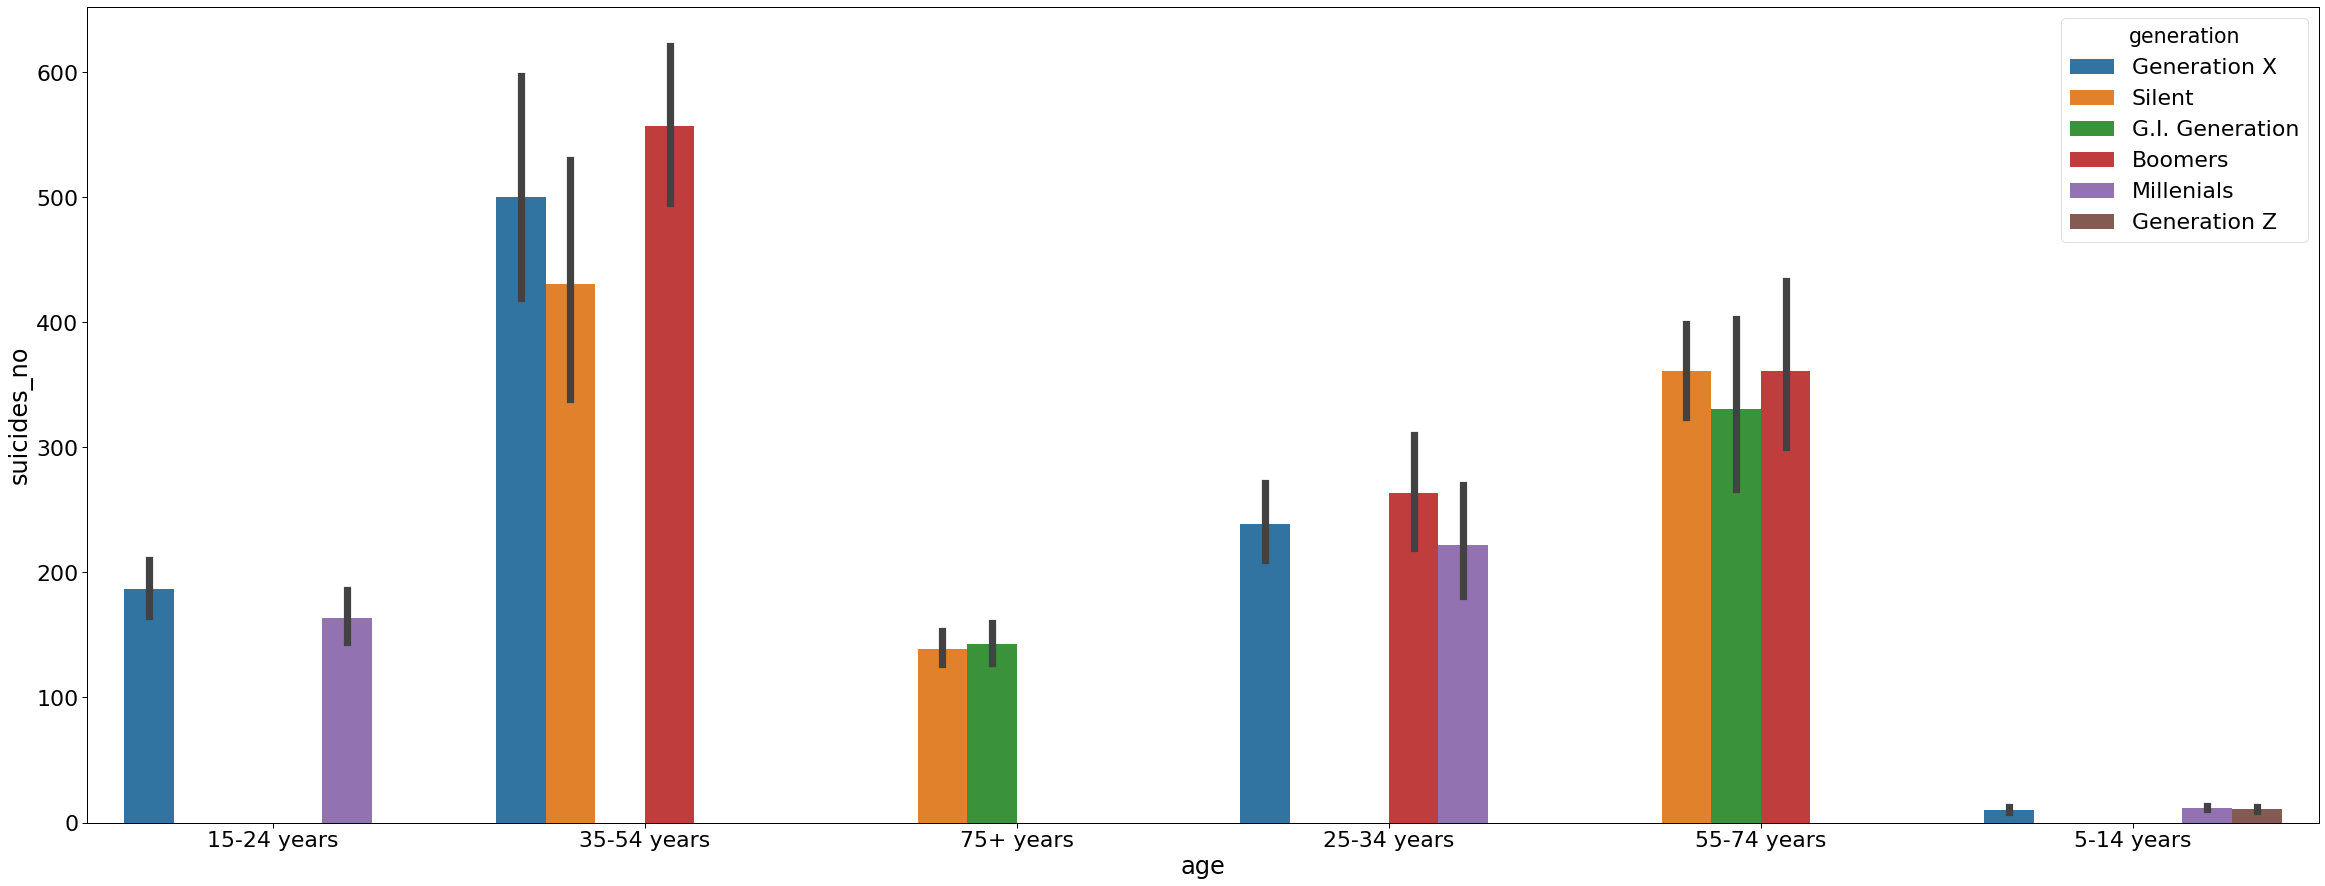

In [22]:
plt.figure(figsize=(40,15))
### Suicídos por idade x geração
bar_idade = sns.barplot(x = 'age', y = 'suicides_no', hue = 'generation',data = df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

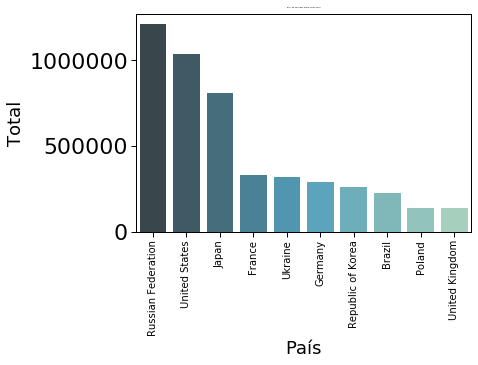

In [46]:
#total suicidios entre 1985 e 2016
new_df = pd.DataFrame(df.groupby('country').sum()['suicides_no'].sort_values(ascending=False).reset_index())
analise_total = new_df.head(10) 
#BUSCANDO OS 10 REGISTROS
#plt.figure(figsize=(40,15))
figure = sns.barplot(x = 'country', y = 'suicides_no', data = analise_total, palette="GnBu_d")
figure.set_title('Total de suicidios entre 1985-2016', {'fontsize': 2})
figure.set_xlabel('País', {'fontsize': 18})
figure.set_ylabel('Total', {'fontsize': 18})

plt.rcParams["xtick.labelsize"] = 10
plt.xticks(rotation= 90)

#CONCLUSAO
visualização dos paises com maior taxas de suicídio
suicidios por faixa de idades
suicidios por geração



